In [2]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

root_path = 'gdrive/My Drive/Colab Notebooks/' #change dir to your project folder

os.chdir('/content/' + root_path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

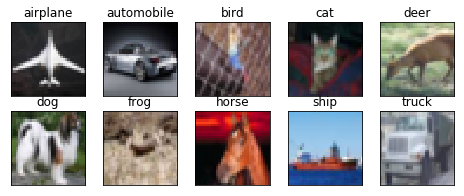

In [5]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
train_labels_integer = train_labels

test_labels_integer = test_labels

for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels_integer[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

from keras.layers import GlobalAveragePooling2D

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), padding="same")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), padding="same")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_200 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
activation_157 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_201 (Conv2D)          (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_158 (Activation)  (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_202 (Conv2D)          (None, 32, 32, 128)       73856     
_________________________________________________________________
activation_159 (Activation)  (None, 32, 32, 128)       0         
_________________________________________________________________
dropout_69 (Dropout)         (None, 32, 32, 128)       0         
__________

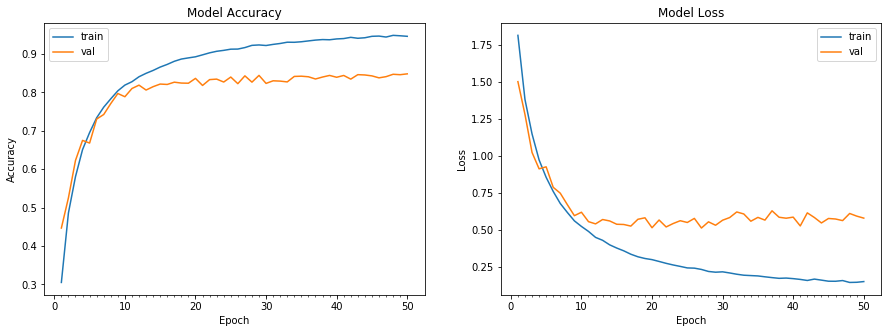

Accuracy on test data is: 84.84


In [153]:
# Define the model

def conv_block(model):
  
  model.add(Convolution2D(64, 3, 3,  border_mode='same')) 
  model.add(Activation('relu'))
  
  model.add(Convolution2D(128, 3, 3, border_mode='same'))
  model.add(Activation('relu'))
  
  model.add(Dropout(0.2))
  
  model.add(Convolution2D(256, 3, 3, border_mode='same'))
  model.add(Activation('relu'))
  
  model.add(Dropout(0.4))
  model.add(Convolution2D(512, 3, 3, border_mode='same'))
  model.add(Activation('relu'))
  
  return model

def transition_block(model):
  

  model.add(Convolution2D(32, 1, 1, border_mode='same'))

  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  return model

model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(32, 32, 3))) #1 #32
model.add(Activation('relu'))

model = conv_block(model) #9 ,32

model = transition_block(model)#10 , 16

model = conv_block(model)#26, 16

model = transition_block(model)#27, 8

#model = conv_block(model)#26, 16

#model.add(Convolution2D(10, 3, 3, border_mode='same')) #37

model.add(Convolution2D(64, 3, 3,  border_mode='same')) 


model.add(GlobalAveragePooling2D())

model.add(Dense(10, activation= "softmax"))
#model.add(Activation('softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

filepath = "assignment_9_eva.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels),callbacks=[checkpoint] ,verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)

model.load_weights(filepath)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
import keras.backend as K
import cv2
from google.colab.patches import cv2_imshow

In [0]:
def show_gradcam(image, model, lchannels = 64, lname="conv2d_91"):
  
  preds = model.predict(image)

  class_idx = np.argmax(preds[0])

  class_output = model.output[:, class_idx]

  last_conv_layer = model.get_layer(lname)
  
  grads = K.gradients(class_output, last_conv_layer.output)[0]

  pooled_grads = K.mean(grads, axis=(0, 1, 2))

  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

  pooled_grads_value, conv_layer_output_value = iterate([image])

  for i in range(lchannels):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
      
  heatmap = np.mean(conv_layer_output_value, axis=-1)

  heatmap = np.maximum(heatmap, 0)

  heatmap /= np.max(heatmap)
  
  img = test_features[img_idx].reshape(32,32,3)
  
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

  heatmap = np.uint8(255 * heatmap)

  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

  superimposed_img = cv2.addWeighted(img, 0.8, heatmap, 0.2, 0, dtype = cv2.CV_64F)

  fig = plt.figure(figsize=(4,3))

  ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])

  ax.set_title("original")

  plt.imshow(img)

  ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])

  ax.set_title("gradcam")

  plt.imshow(superimposed_img)

      #cv2.waitKey(0)


W0706 03:37:59.832869 140657958446976 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0706 03:38:01.374588 140657958446976 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0706 03:38:02.885910 140657958446976 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0706 03:38:04.377183 140657958446976 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


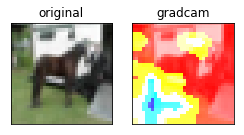

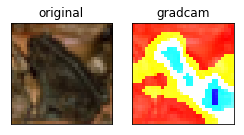

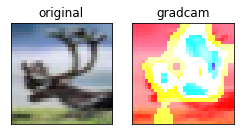

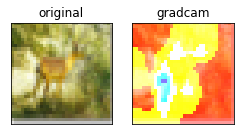

In [154]:
img_idxs = [20, 30, 40, 500]

for img_idx in img_idxs:
  
  image = test_features[img_idx].reshape(1,32,32,3)
  
  show_gradcam(image, model = model, lname="conv2d_211")

In [0]:
import numpy as np


def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
  
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img
      
    return eraser



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), padding="same")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), padding="same")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_176 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
activation_139 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_177 (Conv2D)          (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_140 (Activation)  (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_178 (Conv2D)          (None, 32, 32, 128)       73856     
_________________________________________________________________
activation_141 (Activation)  (None, 32, 32, 128)       0         
_________________________________________________________________
dropout_61 (Dropout)         (None, 32, 32, 128)       0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=585.0, epochs=50)`


Epoch 1/50
585/585 [==============================] - 126s 215ms/step - loss: 1.8822 - acc: 0.2747 - val_loss: 1.5630 - val_acc: 0.4015

Epoch 00001: val_acc improved from -inf to 0.40150, saving model to assignment_9b_eva.hdf5
Epoch 2/50
585/585 [==============================] - 122s 209ms/step - loss: 1.4293 - acc: 0.4672 - val_loss: 1.1877 - val_acc: 0.5662

Epoch 00002: val_acc improved from 0.40150 to 0.56620, saving model to assignment_9b_eva.hdf5
Epoch 3/50
585/585 [==============================] - 122s 209ms/step - loss: 1.1821 - acc: 0.5665 - val_loss: 1.0469 - val_acc: 0.6186

Epoch 00003: val_acc improved from 0.56620 to 0.61860, saving model to assignment_9b_eva.hdf5
Epoch 4/50
585/585 [==============================] - 122s 209ms/step - loss: 0.9999 - acc: 0.6373 - val_loss: 0.8663 - val_acc: 0.6877

Epoch 00004: val_acc improved from 0.61860 to 0.68770, saving model to assignment_9b_eva.hdf5
Epoch 5/50
585/585 [==============================] - 122s 209ms/step - loss: 0

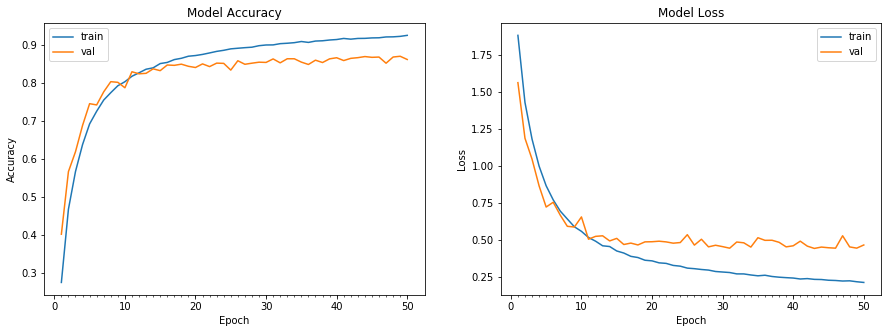

Accuracy on test data is: 86.99


In [147]:
# Define the model

def conv_block(model):
  
  model.add(Convolution2D(64, 3, 3,  border_mode='same')) 
  model.add(Activation('relu'))
  
  model.add(Convolution2D(128, 3, 3, border_mode='same'))
  model.add(Activation('relu'))
  
  model.add(Dropout(0.2))
  
  model.add(Convolution2D(256, 3, 3, border_mode='same'))
  model.add(Activation('relu'))
  
  model.add(Dropout(0.4))
  model.add(Convolution2D(512, 3, 3, border_mode='same'))
  model.add(Activation('relu'))
  
  return model

def transition_block(model):
  

  model.add(Convolution2D(32, 1, 1, border_mode='same'))

  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  return model

model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(32, 32, 3))) #1 #32
model.add(Activation('relu'))

model = conv_block(model) #9 ,32

model = transition_block(model)#10 , 16

model = conv_block(model)#26, 16

model = transition_block(model)#27, 8

#model = conv_block(model)#26, 16

#model.add(Convolution2D(10, 3, 3, border_mode='same')) #37

model.add(Convolution2D(64, 3, 3,  border_mode='same')) 


model.add(GlobalAveragePooling2D())

model.add(Dense(10, activation= "softmax"))
#model.add(Activation('softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

filepath = "assignment_9b_eva.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False,
                            
                            preprocessing_function=get_random_eraser(v_l=0, v_h=1)
                            )


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128), 
                                 samples_per_epoch = train_features.shape[0]*1.5, nb_epoch = 50, 
                                 validation_data = (test_features, test_labels),callbacks=[checkpoint] ,verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)

model.load_weights(filepath)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

W0706 02:26:28.231600 140657958446976 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0706 02:26:29.637877 140657958446976 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0706 02:26:30.933999 140657958446976 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0706 02:26:32.189999 140657958446976 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


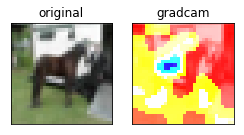

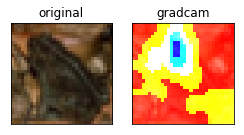

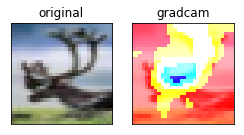

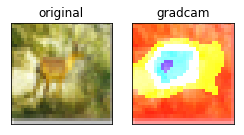

In [151]:
img_idxs = [20, 30, 40, 500]

for img_idx in img_idxs:
  
  image = test_features[img_idx].reshape(1,32,32,3)
  
  show_gradcam(image, model = model, lname="conv2d_187")

In [0]:
def get_wrongly_classified_indices(predictions, y_vals):
  
  """
  Takes predicted and actual values
  Returns a tuple of misclassified image indexes and their corresponding predicted and actual values
  
  NOTE: Make sure your predictions are in the same order of actuals, using shuffle=False while predicting would be important
  
  Params:
  predictions: probability values of predictions
  y_vals: actual values of data
  """
  
  predicted_y = np.argmax(predictions, axis=1)
  
  actual_y = np.argmax(y_vals, axis = 1)
  
  wrong_indices = np.nonzero(~(actual_y == predicted_y))
  
  return (wrong_indices[0], predicted_y[wrong_indices[0]], actual_y[wrong_indices[0]])
  
  
def plot_figures(figures, nrows = 1, ncols=1):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15,20))
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(figures[title],)
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    #plt.tight_layout() # optional
    plt.subplots_adjust(hspace = 0.5)
    plt.show()
    
predictions = model.predict(test_features)
    
misclassified_image_idx = get_wrongly_classified_indices(predictions, test_labels_integer)

misclassified_image_idx

(array([   2,    3,    6, ..., 9981, 9982, 9989]),
 array([1, 8, 9, ..., 7, 6, 4]),
 array([8, 0, 1, ..., 4, 2, 2]))

In [0]:
number_of_im = len(misclassified_image_idx[0])

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

if (number_of_im) > 25:
  number_of_im = 25

figures = {}

for i in range(number_of_im):
  
  title = str(i+1)+'.\tPredicted: '.expandtabs()+class_names[misclassified_image_idx[1][i]] + '\n\tActual: '.expandtabs() + class_names[misclassified_image_idx[2][i]]
  
  img_idx = misclassified_image_idx[0][i]
  
  image = test_features[img_idx].reshape(32,32,3)
  
  figures[title] = image
  

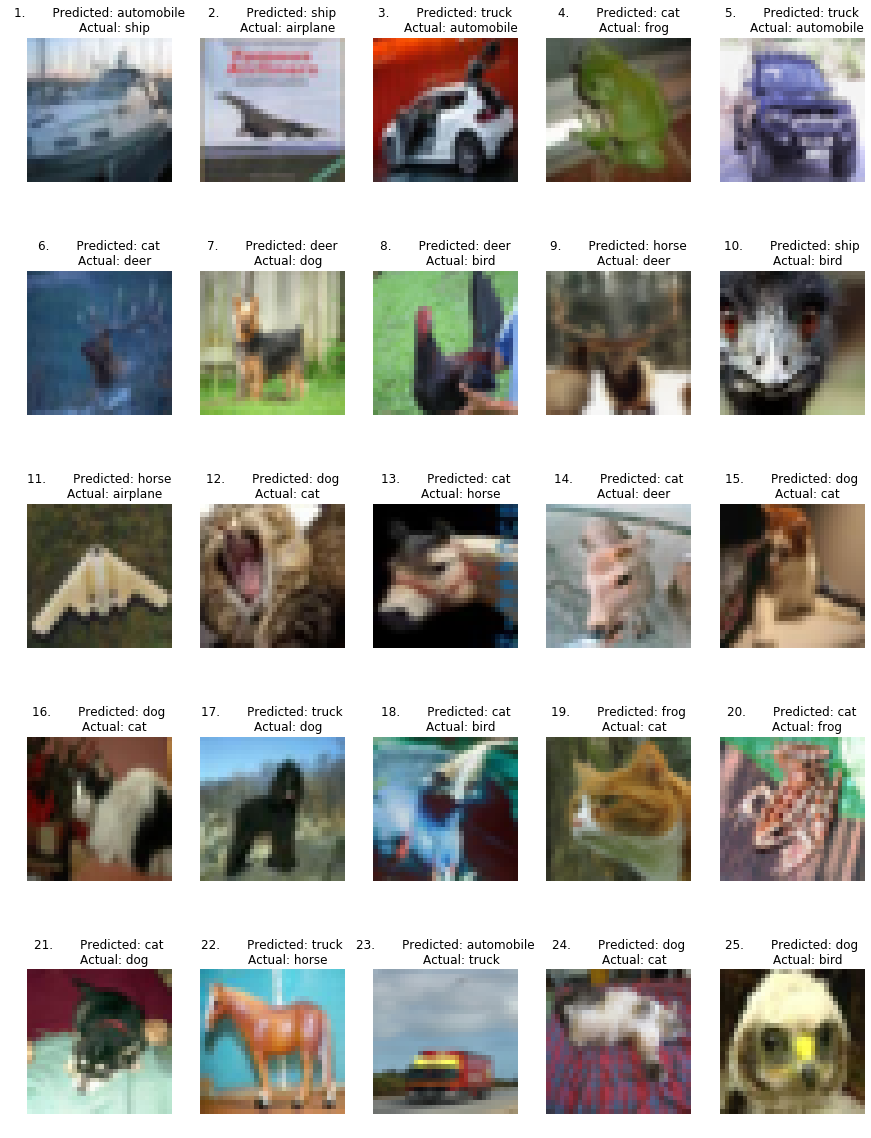

In [0]:
plot_figures(figures, 5, 5)